# Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import math
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from numpy import absolute

# Data Preprocessing 

In [2]:
#reading training dataset provided
all_data=pd.read_excel('trainDataset.xls', index_col=False)
all_data.head() 

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


In [4]:
all_data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.727500,56.159792,51.851171,0.540000,2.900000,2.81000,2.830000,9.880000,6.577500,8.625000,...,3.945420e-01,3.899257e-01,2.711993e+00,0.003314,5.683152e+07,176.969142,32500.032680,0.056721,0.005948,0.029385
std,111.104111,26.763774,10.864462,0.499022,49.932235,49.93649,49.935558,86.092482,70.443308,86.200962,...,1.674769e-01,1.624792e-01,7.556631e-01,0.002412,7.063822e+08,1045.305721,177545.921557,0.047363,0.008416,0.115909
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.616016,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,...,3.199017e-01,3.175584e-01,2.330664e+00,0.001334,1.078546e+06,18.628013,0.001851,0.018628,0.000310,0.001535
50%,0.000000,55.041667,51.119781,1.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.807355e+00,0.002888,3.366594e+06,66.507214,0.004399,0.047029,0.002301,0.003384
75%,1.000000,73.000000,60.000000,1.000000,1.000000,1.00000,1.000000,3.000000,2.000000,1.000000,...,5.000660e-01,4.962633e-01,3.277613e+00,0.004707,9.231697e+06,154.300334,0.013846,0.084418,0.007873,0.009558
max,999.000000,144.000000,79.603012,1.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [5]:
#Removing the ID, and RFS column as we are doing ML on PCR (classification)
all_data = all_data.drop(["ID", "RelapseFreeSurvival (outcome)"], axis=1)
all_data.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [6]:
#Replacing missing values in PCR with a backward fill
all_data.replace(999, np.nan, inplace=True)
all_data["pCR (outcome)"] = all_data["pCR (outcome)"].fillna(method='bfill')

In [7]:
#Replacing missing values for rest of the values with the mean in each column
all_data = all_data.fillna(all_data.mean(axis=0))


all_data.isnull().sum()

pCR (outcome)                0
Age                          0
ER                           0
PgR                          0
HER2                         0
                            ..
original_ngtdm_Busyness      0
original_ngtdm_Coarseness    0
original_ngtdm_Complexity    0
original_ngtdm_Contrast      0
original_ngtdm_Strength      0
Length: 118, dtype: int64

In [8]:
#Removing outliers using an interquartile range
Q1 = all_data.quantile(0.05)
Q3 = all_data.quantile(0.95)
IQR = Q3 - Q1

all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,0.0,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,1.0,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.0,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.0,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,46.1,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.439568,0.439568,3.056046,0.001339,1.671271e+07,79.989003,0.003282,0.024716,0.000812,0.003078
396,0.0,53.3,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
397,0.0,68.8,1,0.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368
398,0.0,46.0,1,0.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.670229,0.670229,1.857045,0.006706,5.609262e+05,9.609163,0.026591,0.018682,0.000311,0.022676


In [9]:
#reformat the data to remove the empty rows left behind from removing outliers
y = all_data["pCR (outcome)"]
y.reset_index(drop=True, inplace=True)
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: pCR (outcome), dtype: float64

In [10]:
#reformat the data to remove the empty rows left behind from removing outliers
x = all_data.drop("pCR (outcome)", axis=1)
x.reset_index(drop=True, inplace=True)
x.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


# Normalisation

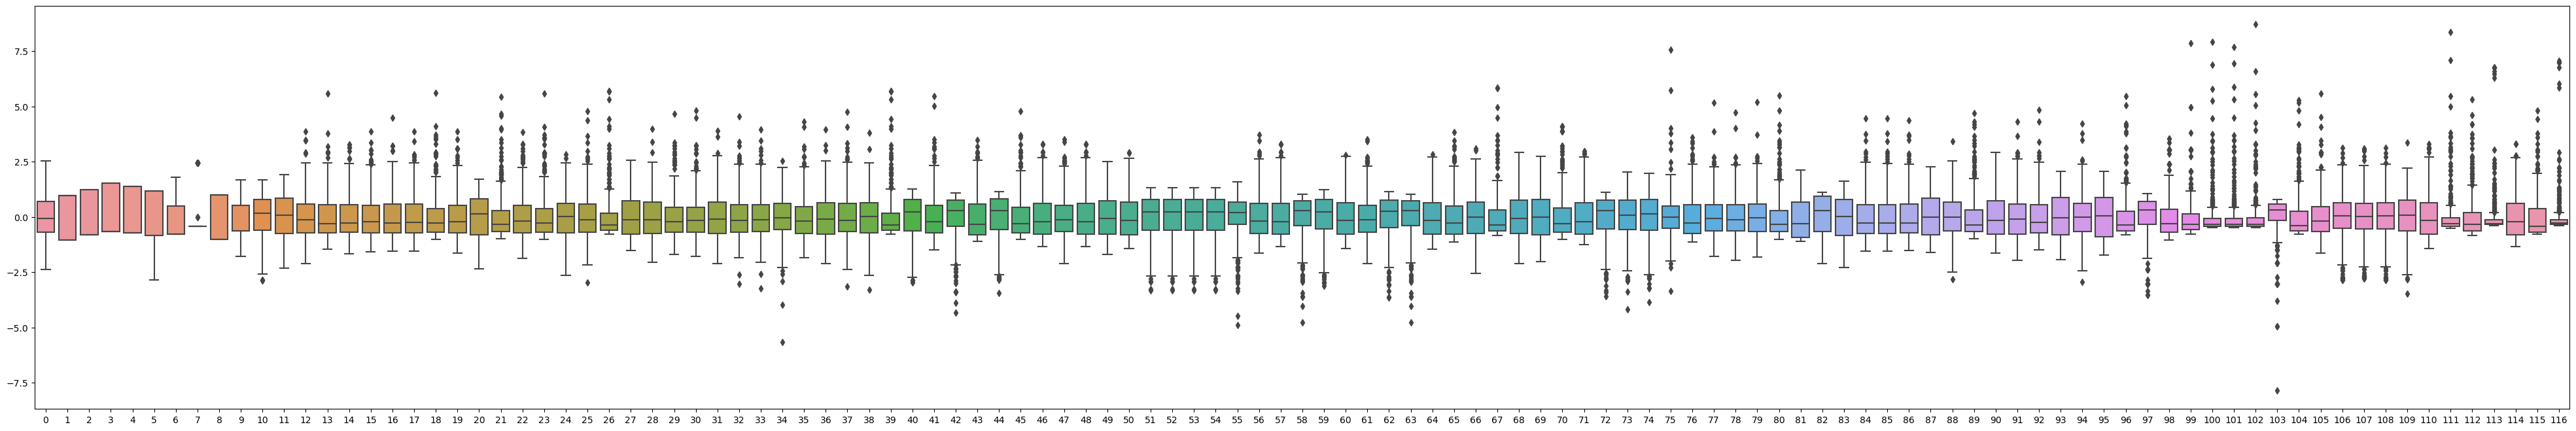

In [11]:
from sklearn.preprocessing import StandardScaler

#Normalising the data to improve ML models and stop bias with features of higher values
scaler = StandardScaler()
xs = scaler.fit_transform(x)
fig,ax=plt.subplots(1,figsize=(50,8))
sns.boxplot(data=xs,ax=ax) 

### Data visualisation

In [12]:
x.columns

Index(['Age', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade',
       'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage',
       ...
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_glszm_ZoneVariance', 'original_ngtdm_Busyness',
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength'],
      dtype='object', length=117)

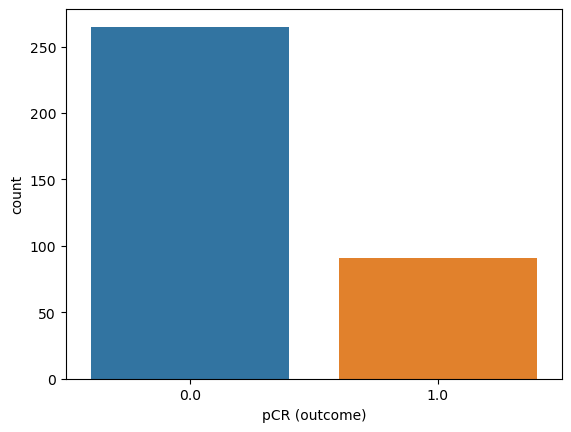

In [13]:
#Displaying the amount of values in each outcome
sns.countplot(x="pCR (outcome)", data=all_data)

In [14]:
(y == 0).sum()

265

In [15]:
(y == 1).sum()

91

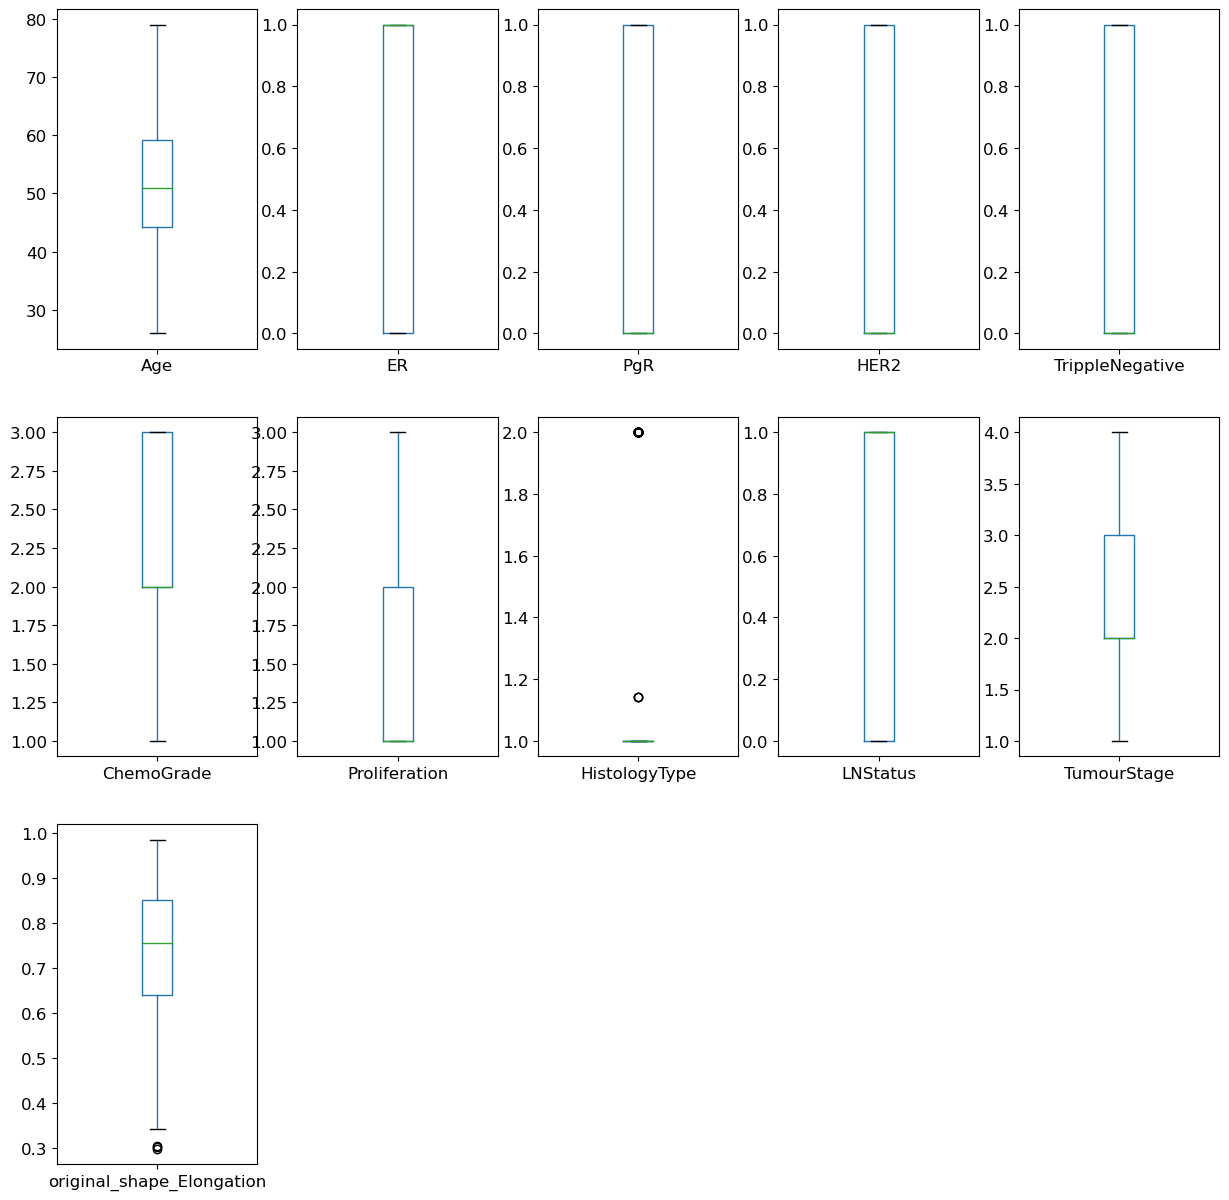

In [16]:
#Box plot to display which feature values may correlate to the outcome
data_mean = x.iloc[:, :11]
data_mean.plot(kind='box', subplots=True, layout=(3,5), sharex=False,
sharey=False, fontsize=12, figsize=(15,15));

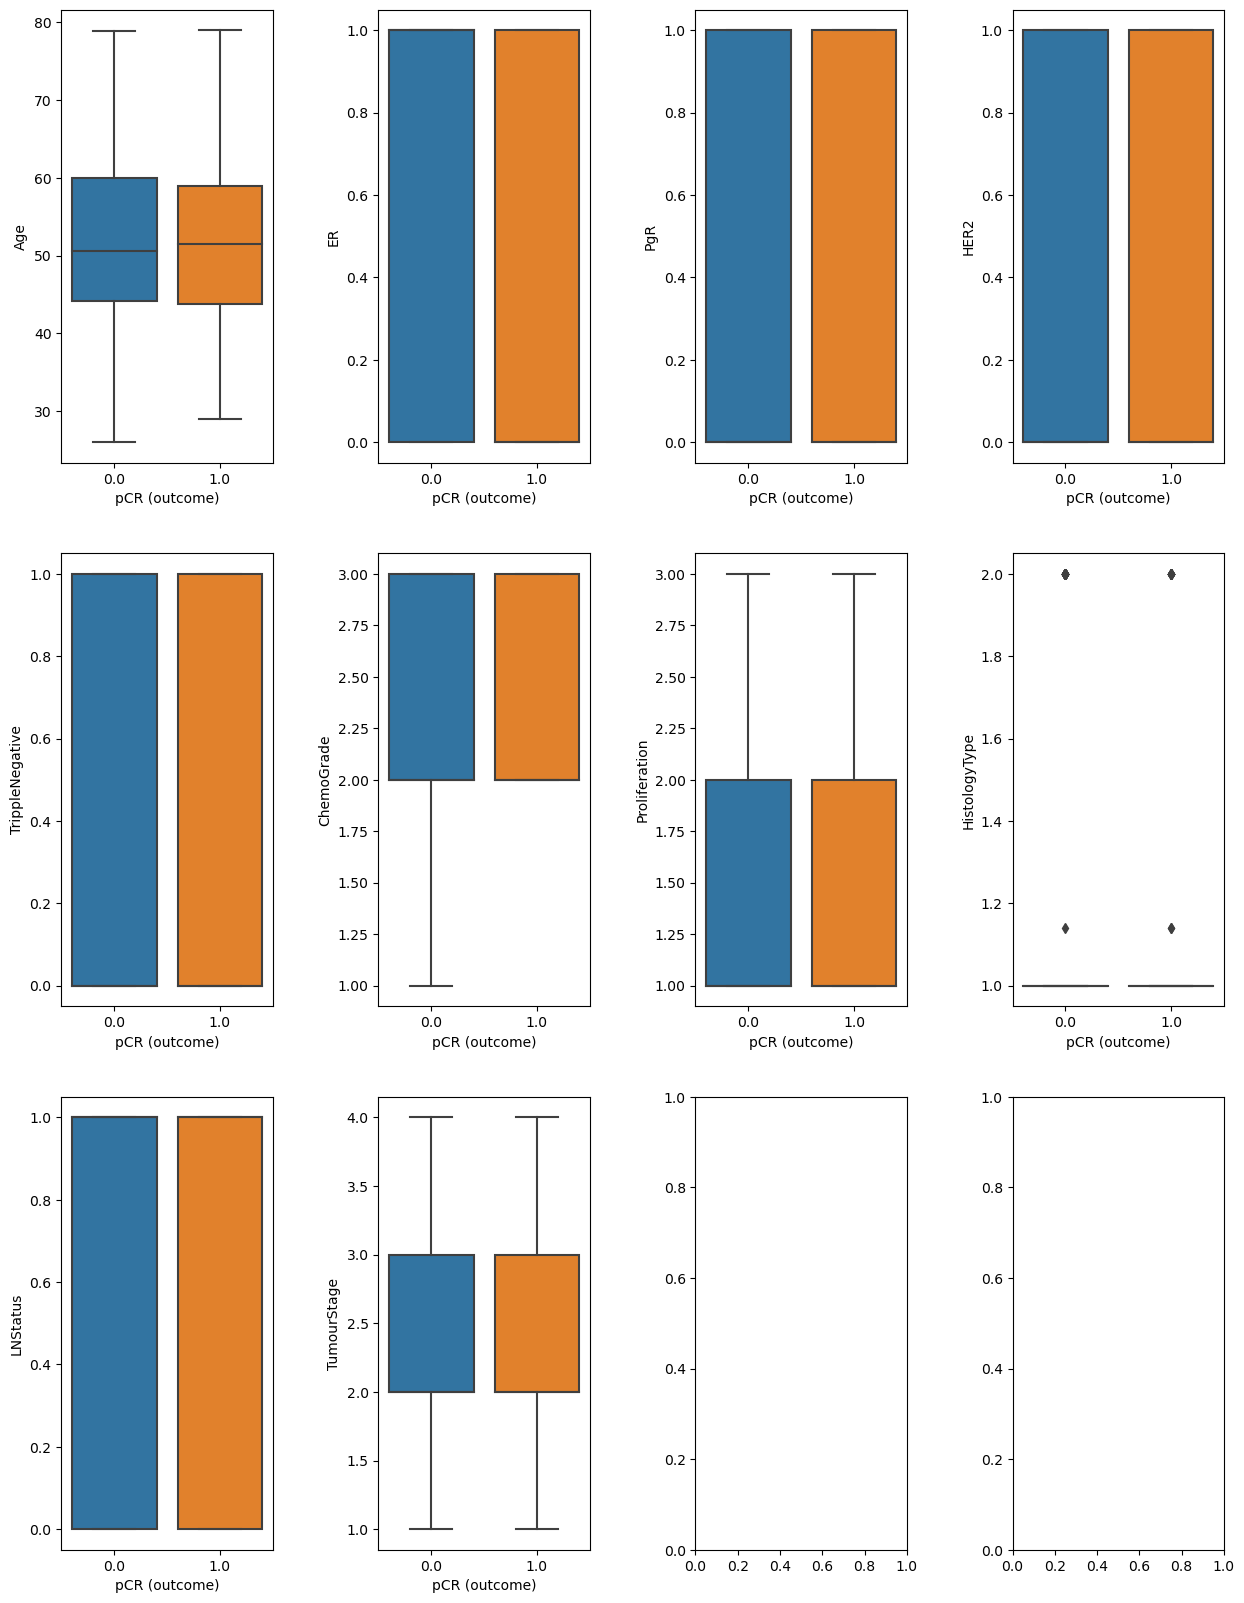

In [17]:
#Box plots displaying the outcomes depending on feature values
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(all_data.columns[1:11]):
    _= sns.boxplot(y=col, x='pCR (outcome)', data=all_data, ax=axes[i])


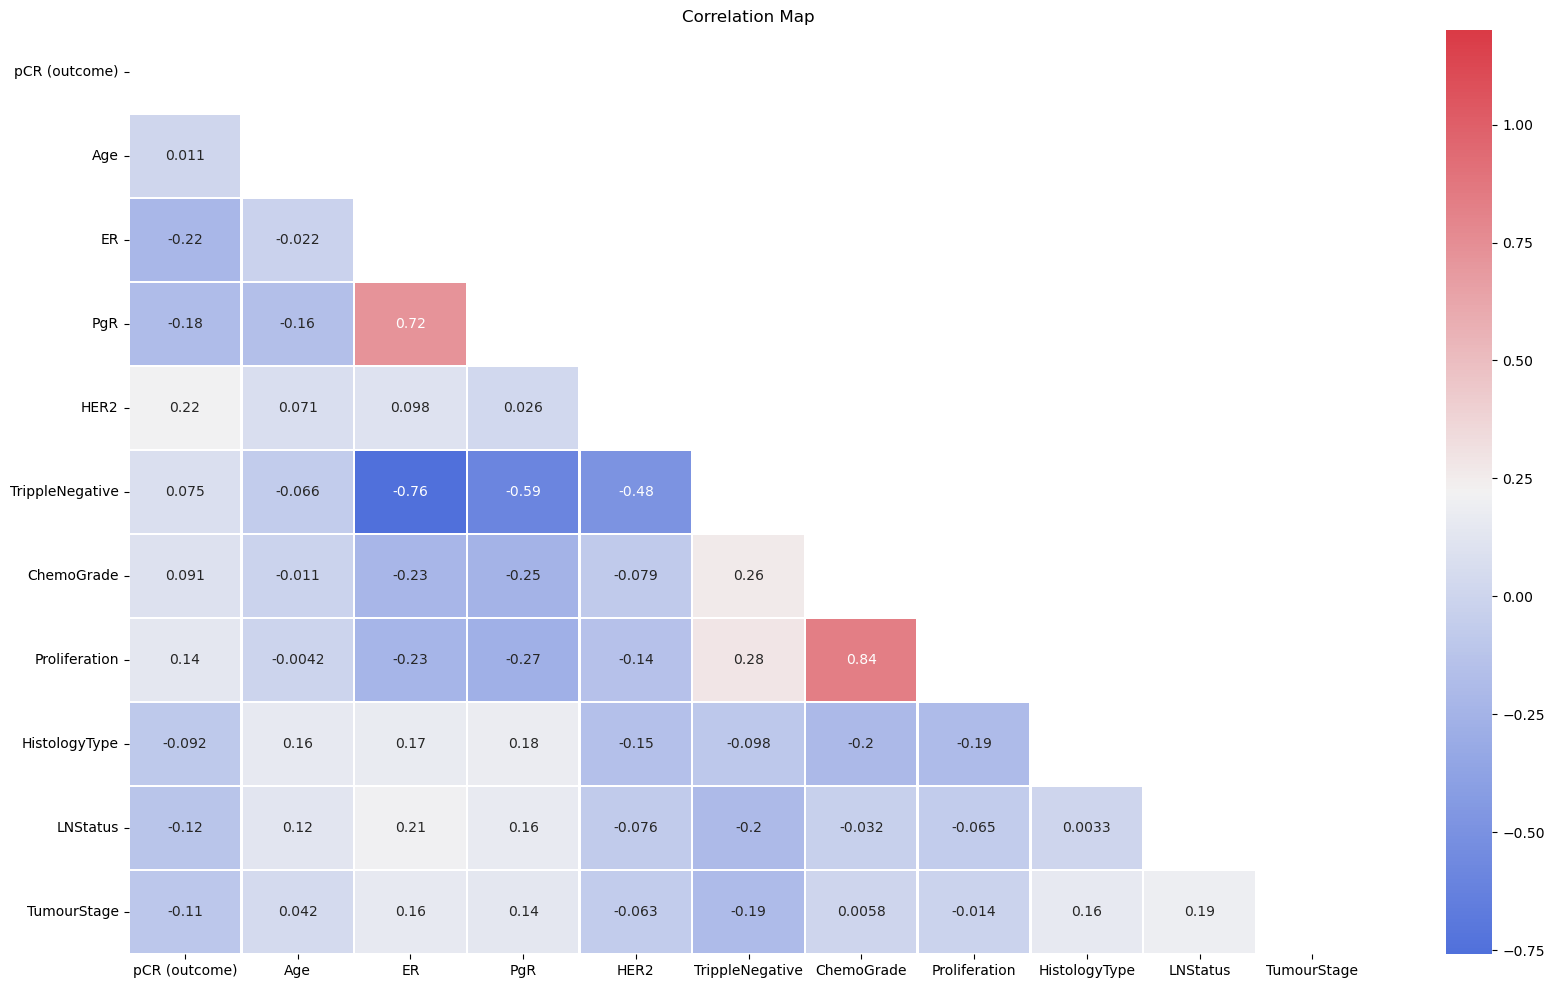

In [18]:
#Creating a heatmap to identify correlations
FirstTenFeatures = all_data.iloc[:, :11]
corrMatt = FirstTenFeatures.corr()
# Generating a mask
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Correlation Map')
# Creating a colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Drawing the heatmap
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

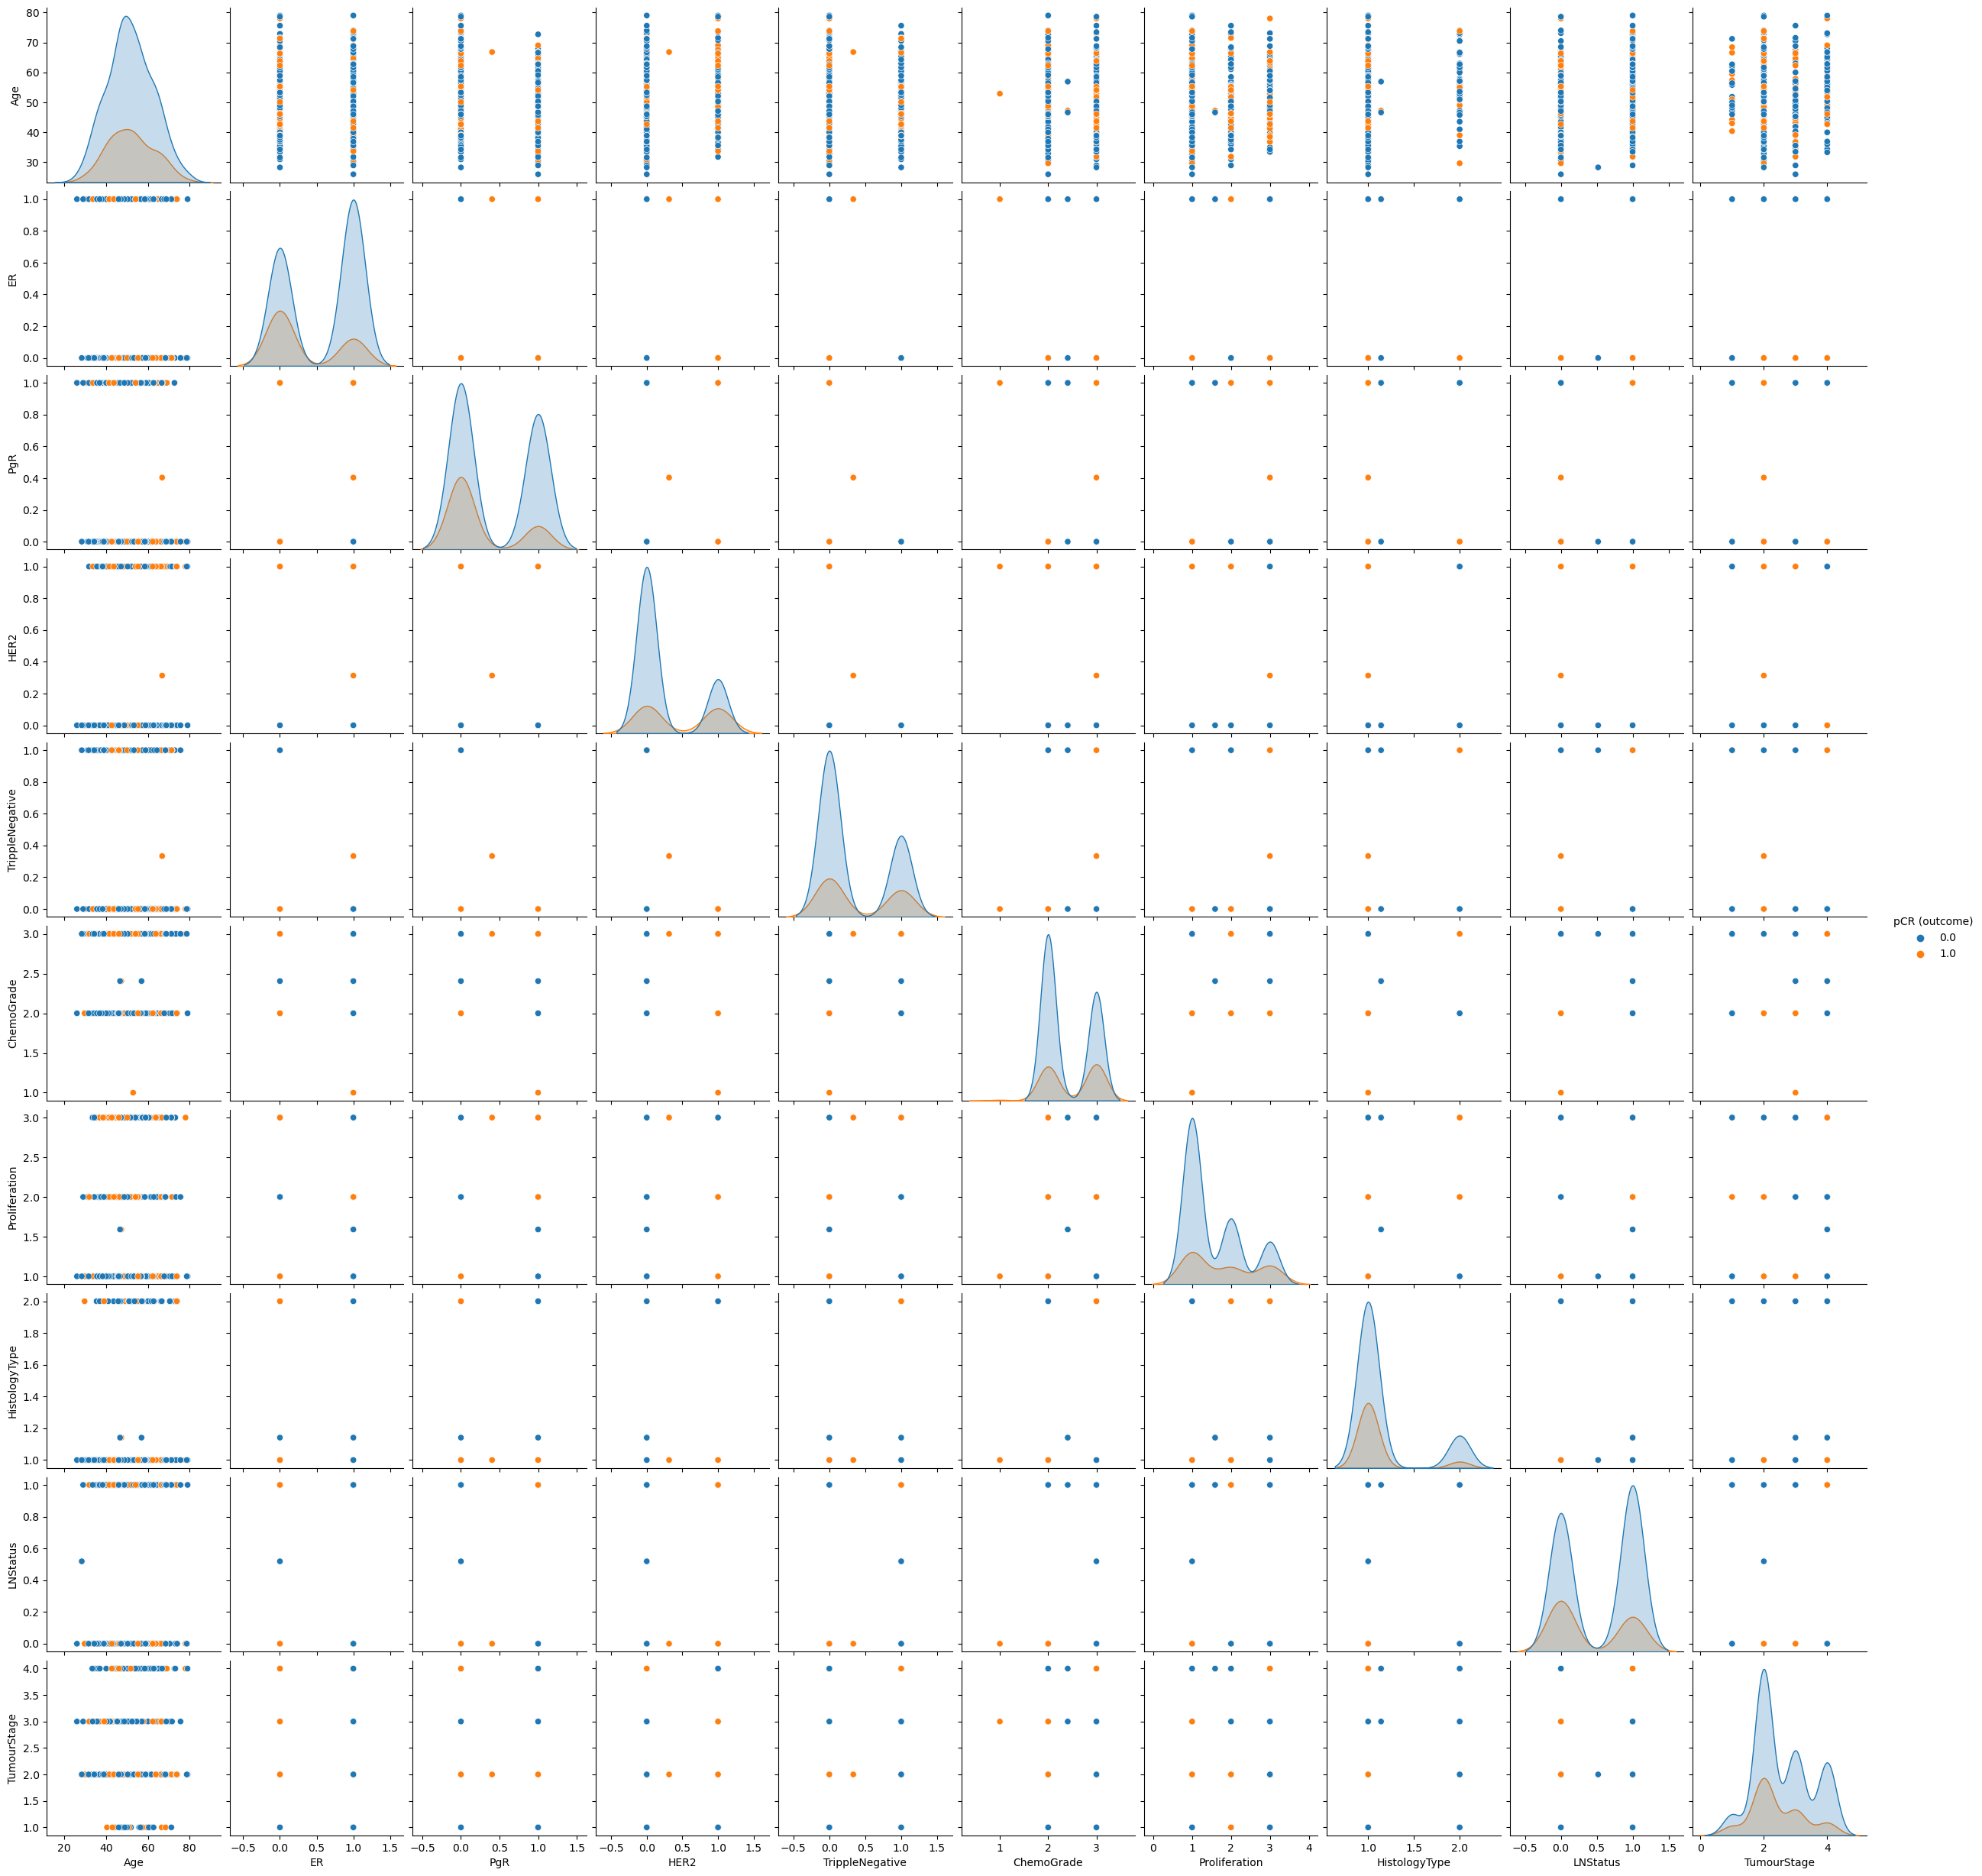

In [19]:
#Pair plot of features
sns.pairplot(all_data[list(all_data.columns[1:11]) + ['pCR (outcome)']], hue="pCR (outcome)");

# Feature selection/ Feature Reduction

In [20]:
#Names of the features
feature_names = list(x.columns)

In [21]:
#Using SelectKBest and different feature selection methods, Using f_classif in our final models
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

f_selector = SelectKBest(f_classif, k=20)

kbest = f_selector.fit_transform(xs, y)
print(kbest)

[[-1.04013045 -0.81289194 -0.66223222 ... -0.70204477 -0.44161075
   0.44161075]
 [ 0.96141787  1.23365933 -0.66223222 ...  0.63804323  0.86224831
  -0.86224831]
 [-1.04013045 -0.81289194 -0.66223222 ...  0.31766271  0.84393983
  -0.84393984]
 ...
 [ 0.96141787 -0.81289194 -0.66223222 ...  0.55676338  0.49356549
  -0.49356549]
 [ 0.96141787 -0.81289194 -0.66223222 ... -1.05448366  0.42970737
  -0.42970737]
 [-1.04013045 -0.81289194  1.51436758 ... -0.29983562  0.74137492
  -0.74137491]]


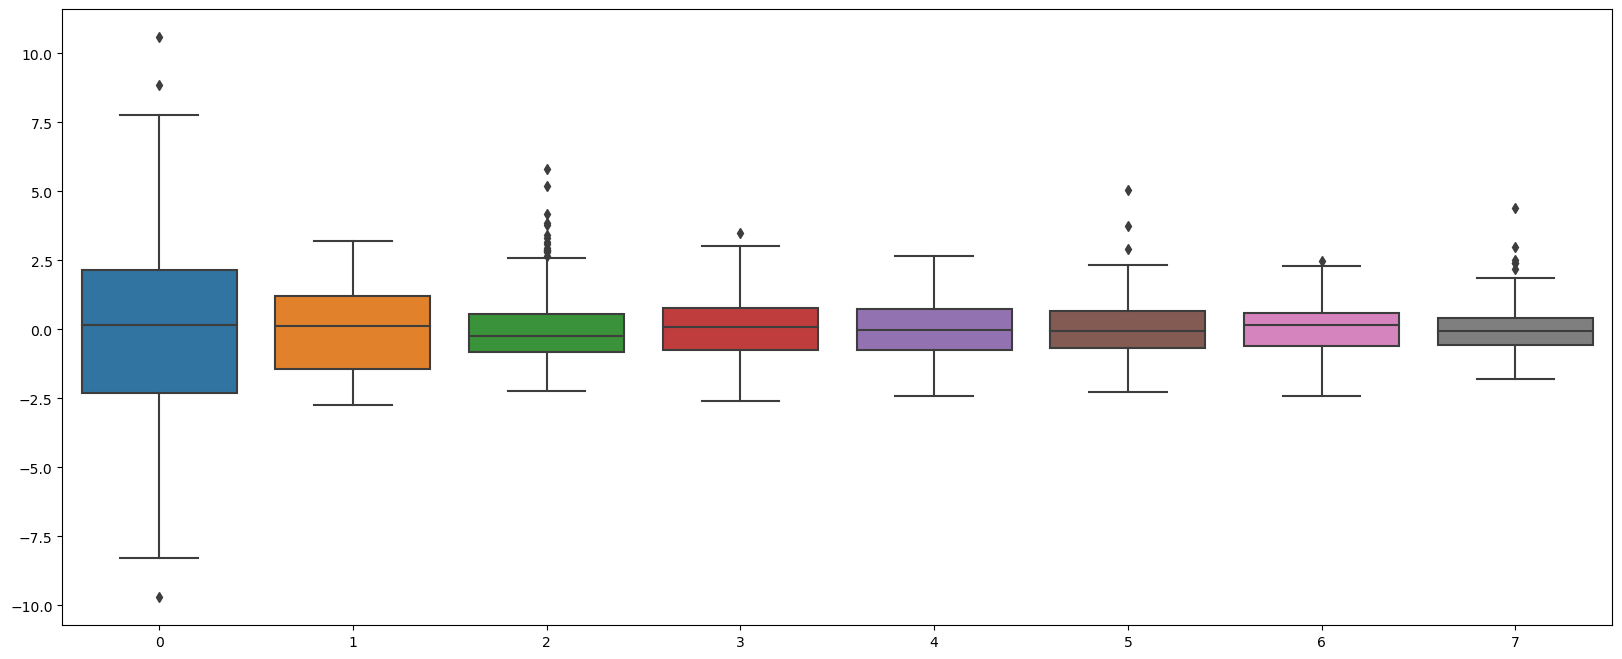

In [22]:
#Using PCA to reduce the feature dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
xs_pca = pca.fit_transform(kbest)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=xs_pca,ax=ax) 

In [23]:
n_components = len(xs_pca[0])

# Machine Learning Methods

### Logistic Regression

In [24]:
#Splitting the data into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xs_pca , y, test_size=0.3, random_state = 0, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(249, 8) (249,)
(107, 8) (107,)


In [25]:
# Logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

n_folds = 5

# Tested Logistic Regression with recursive feature elimination (no added benefit)
# logregression = LogisticRegression()
# RFESelected = RFE(estimator=logregression, n_features_to_select=20, step=1)
# RFESelected.fit(x_train, y_train)

# Using normal Logistic regression 
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
log_score = np.average(cross_val_score(logReg, xs_pca, y, cv=n_folds, scoring = 'accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, log_score))

The 5-fold cross-validation accuracy score for this classifier is 0.73


In [26]:
#Prediction from logistic regression model
yprediction = logReg.predict(x_test)
accuracy_score(y_test, yprediction)

0.7570093457943925

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86        80
         1.0       0.57      0.15      0.24        27

    accuracy                           0.76       107
   macro avg       0.67      0.56      0.55       107
weighted avg       0.72      0.76      0.70       107



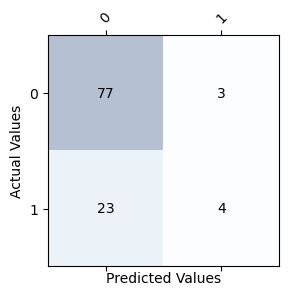

In [27]:
# Confusion matrix on the predictions
from sklearn.metrics import confusion_matrix, classification_report
y_pred = logReg.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j],
            va='center', ha='center')
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )

plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred ))

In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.23529411764705882


### SVM

In [29]:
#Training SVM model
from sklearn.svm import SVC

svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svm.fit(x_train, y_train)

SVC(gamma='auto', probability=True)

In [30]:
#SVM score
svc_score = np.average(cross_val_score(svm, xs_pca, y, cv=n_folds, scoring = 'accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, svc_score))

The 5-fold cross-validation accuracy score for this classifier is 0.75


In [31]:
#Prediction from SVM model
yprediction = svm.predict(x_test)
accuracy_score(y_test, yprediction)

0.7289719626168224

              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84        80
         1.0       0.33      0.07      0.12        27

    accuracy                           0.73       107
   macro avg       0.54      0.51      0.48       107
weighted avg       0.65      0.73      0.66       107



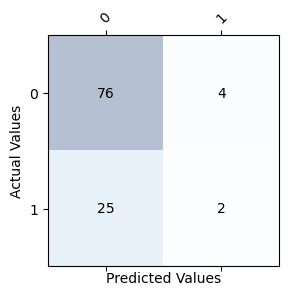

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = svm.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j],
            va='center', ha='center')
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )

plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred ))

In [33]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.12121212121212122


# SVC hyper parameter tuning

In [34]:
#SVM with hyper parameter tuning (Model overfitted, not reliable on new data)
from sklearn.model_selection import GridSearchCV
  
# parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
             } 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.680 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.640 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.580 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.660 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.633 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.740 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.620 total time=   0.1s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.560 total time=   0.0s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.600 total time=   0.1s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.633 total time=   0.2s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.640 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.580 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.620 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.633 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END .......C=10, ga

[CV 4/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.680 total time=   0.0s
[CV 5/5] END .C=100, gamma=0.01, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.740 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.755 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.740 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.740 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.740 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.740 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.755 total time=   0.0s
[CV 1/5] END C=100, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [35]:
#Printing best paramteres
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVC(C=100, gamma=0.001, kernel='sigmoid')


In [36]:
#Creating SVM using best parameters
svcBest = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)
svcBest.fit(x_train, y_train)

svc2_score = np.average(cross_val_score(svcBest, xs_pca, y, cv=n_folds, scoring = 'accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, svc2_score))

The 5-fold cross-validation accuracy score for this classifier is 0.75


In [37]:
#Predictions from parameter tuned model
yprediction = svcBest.predict(x_test)
accuracy_score(y_test, yprediction)

0.7476635514018691

### Decision Tree

In [38]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision tree using random forest(did not improve score)
#dtree = RandomForestClassifier(n_estimators = 500, max_depth=3, bootstrap=True, random_state=1).fit(x_train,y_train)

#Decision tree tuned only for max depth = 3
dtree = tree.DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [39]:
#Score from Decision tree
tree_score = np.average(cross_val_score(dtree, xs_pca, y, cv=n_folds, scoring = 'accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, tree_score))

The 5-fold cross-validation accuracy score for this classifier is 0.74


In [40]:
#Prediction based on decision tree model
yprediction = dtree.predict(x_test)
accuracy_score(y_test, yprediction)

0.7757009345794392

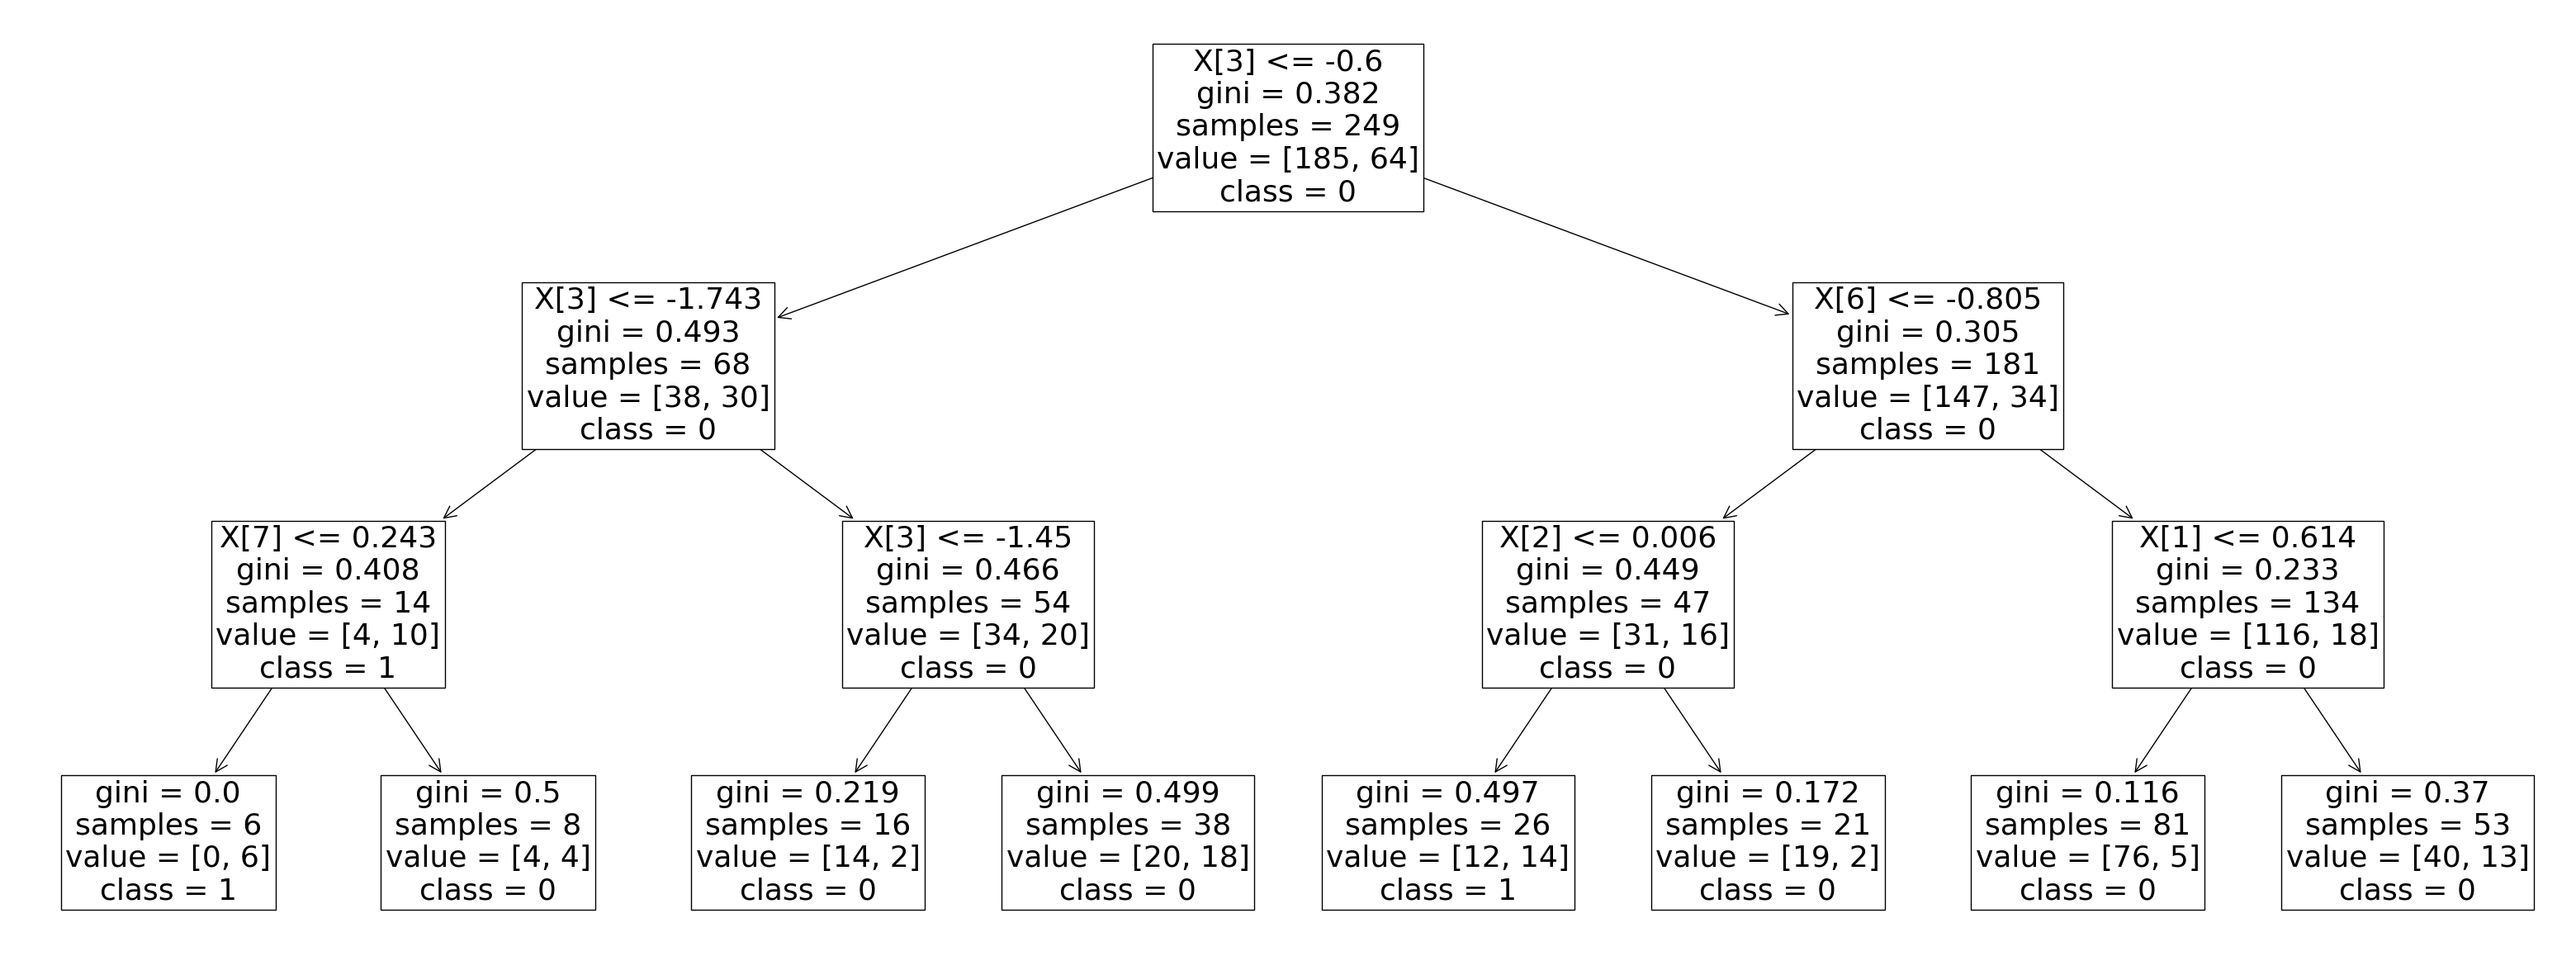

In [41]:
#Plotting decision tree
target_names = ['0', '1']
plt.figure(figsize=(40,15))  
_ = tree.plot_tree(dtree, class_names=target_names, fontsize=26)
plt.show()

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        80
         1.0       0.67      0.22      0.33        27

    accuracy                           0.78       107
   macro avg       0.73      0.59      0.60       107
weighted avg       0.76      0.78      0.73       107



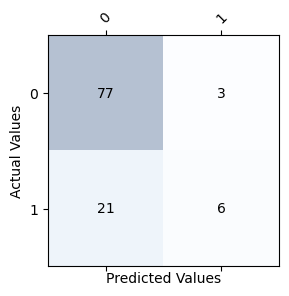

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = dtree.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j],
            va='center', ha='center')
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )

plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred ))

In [43]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.3333333333333333


### ANN

In [44]:
#Creating ANN model
from tensorflow import keras
from keras.layers import Dropout

xsa_pca =  xs_pca
input_layer = len(xs_pca[0])

model=keras.models.Sequential()
#model.add(keras.layers.Dense((3*input_layer), input_dim=input_layer, activation="relu"))

model.add(keras.layers.Dense(80, input_dim=input_layer, activation="relu"))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(80, activation="relu"))

model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.callbacks import EarlyStopping

# Create a callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [46]:
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.save_weights('model.h5')

In [47]:
Xs_train, Xs_test, y_train, y_test = train_test_split(xsa_pca, y, test_size=0.2, random_state=0, stratify=y)

model.load_weights('model.h5')

history= model.fit(np.array(Xs_train), np.array(y_train), epochs=200, validation_data=(np.array(Xs_test), np.array(y_test)),  callbacks=[early_stopping])

Epoch 1/200
9/9 [==============================] - 1s 33ms/step - loss: 0.5825 - accuracy: 0.7430 - val_loss: 0.5481 - val_accuracy: 0.7500
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 0.5308 - accuracy: 0.7430 - val_loss: 0.5236 - val_accuracy: 0.7500
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.7465 - val_loss: 0.5117 - val_accuracy: 0.7639
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.4722 - accuracy: 0.7641 - val_loss: 0.5145 - val_accuracy: 0.7778
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.4611 - accuracy: 0.7711 - val_loss: 0.5264 - val_accuracy: 0.7222
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.7782 - val_loss: 0.5222 - val_accuracy: 0.7361
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.7746 - val_loss: 0.5343 - val_accuracy: 0.7083
Epoch 8/200
9/9 [=========

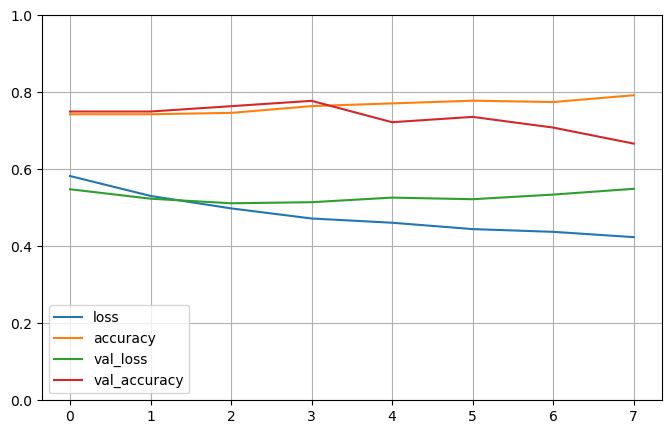

In [48]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [49]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
k=1;
for train_index, test_index in kf.split(xsa_pca):
    print("fold",k)
    
    model.load_weights('model.h5')

    X_train, X_test = xsa_pca[train_index], xsa_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(np.array(X_train), np.array(y_train), epochs=40, validation_data=(np.array(X_test), np.array(y_test)),  callbacks=[early_stopping])

    scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    k=k+1

fold 1
Epoch 1/40
9/9 [==============================] - 0s 11ms/step - loss: 0.6183 - accuracy: 0.7218 - val_loss: 0.4835 - val_accuracy: 0.8333
Epoch 2/40
9/9 [==============================] - 0s 6ms/step - loss: 0.5757 - accuracy: 0.7218 - val_loss: 0.4353 - val_accuracy: 0.8333
Epoch 3/40
9/9 [==============================] - 0s 6ms/step - loss: 0.5450 - accuracy: 0.7218 - val_loss: 0.4281 - val_accuracy: 0.8333
Epoch 4/40
9/9 [==============================] - 0s 6ms/step - loss: 0.5157 - accuracy: 0.7254 - val_loss: 0.4198 - val_accuracy: 0.8333
Epoch 5/40
9/9 [==============================] - 0s 6ms/step - loss: 0.4916 - accuracy: 0.7535 - val_loss: 0.4177 - val_accuracy: 0.8194
Epoch 6/40
9/9 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.7535 - val_loss: 0.4202 - val_accuracy: 0.8194
Epoch 7/40
9/9 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.7782 - val_loss: 0.4263 - val_accuracy: 0.8194
Epoch 8/40
9/9 [==========

In [50]:
x_train, x_test, y_train, y_test = train_test_split(xsa_pca, y, test_size=0.3,random_state=42, stratify=y)

loss, acc = model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
print("Model, accuracy: {:5.2f}%".format(100 * acc))
ann_score = acc;

Model, accuracy: 79.44%


In [51]:
y_pred = model.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_pred = y_pred.flatten()
print(y_pred)

4/4 [==============================] - 0s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]


In [52]:
accuracy_score(y_test, y_pred)

0.794392523364486

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        80
         1.0       0.65      0.41      0.50        27

    accuracy                           0.79       107
   macro avg       0.73      0.67      0.69       107
weighted avg       0.78      0.79      0.78       107



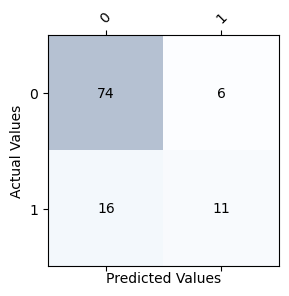

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
            s=cm[i, j],
            va='center', ha='center')
classes=["0","1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )

plt.ylabel('Actual Values');
print(classification_report(y_test, y_pred ))

In [54]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.5


In [55]:
#Function called from test file to read test data, prepare it for the models to calculate the predictions
def best_eval(string):
    test_data=pd.read_excel(string, index_col=False)
    test_data = test_data.drop(["ID"], axis=1)
    test_data.replace(999, np.nan, inplace=True)
    test_data = test_data.fillna(all_data.mean(axis=0))
    test_data = scaler.fit_transform(test_data)
    test_data = f_selector.transform(test_data)
    test_data = pca.fit_transform(test_data)
    pred = model.predict(test_data)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred
    